# 50_startups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df= pd.read_csv('50_startups.csv')

In [3]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


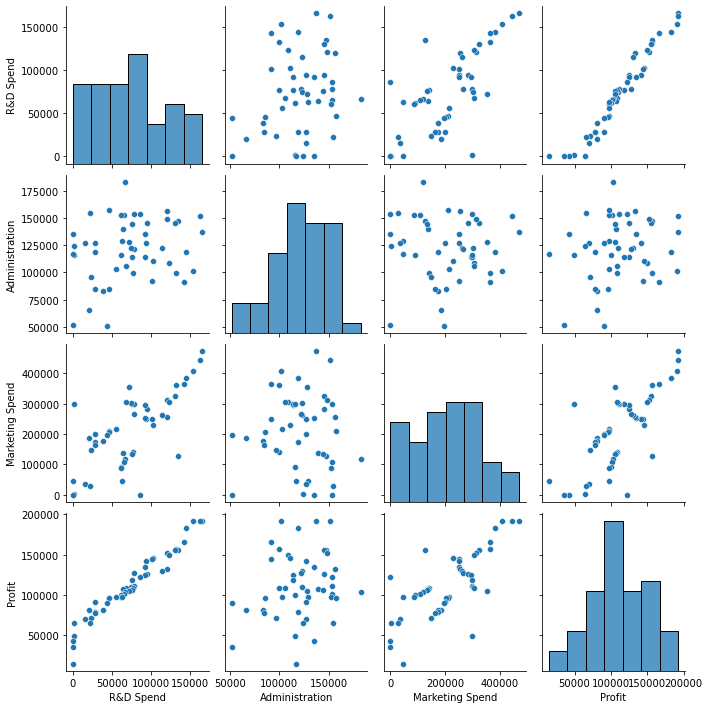

In [7]:
sns.pairplot(df)


In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
#highest correlation in profit and R&D Spend column.

In [10]:
df_cleaned = pd.get_dummies(df, columns=['State'])
df_cleaned.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [11]:
df_cleaned.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<AxesSubplot:>

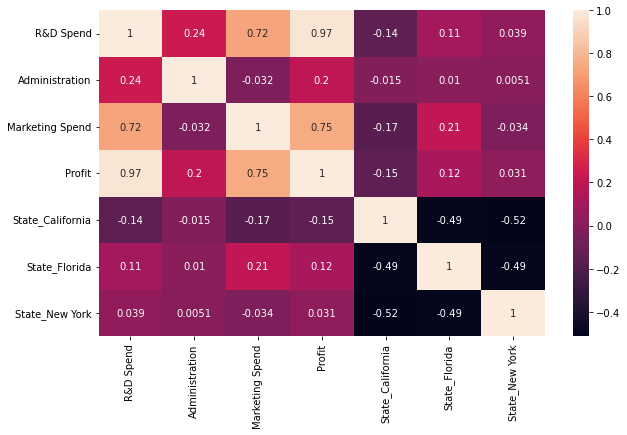

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(),annot = True)

In [13]:
#preprocessing
df_cleaned.rename(columns={'Administration':'A'},inplace=True)
df_cleaned.rename(columns={'Marketing Spend':'M'},inplace=True)
df_cleaned.rename(columns={'R&D Spend':'R'},inplace=True)
df_cleaned.rename(columns={'State_New York':'NW'},inplace=True)
df_cleaned

,R,A,M,Profit,State_California,State_Florida,NW
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
df_cleaned_std = std.fit_transform(df_cleaned)
df_cleaned_std = pd.DataFrame(df_cleaned_std, columns=df_cleaned.columns)
df_cleaned_std.head(3)


,R,A,M,Profit,State_California,State_Florida,NW
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741


In [15]:
model_ram = smf.ols('Profit~R+A+M+State_California+State_Florida+NW',data = df_cleaned_std).fit()

In [16]:
model_ram.params

Intercept          -5.204170e-16
R                   9.179307e-01
A                  -1.877136e-02
M                   8.185781e-02
State_California   -6.031706e-04
State_Florida       1.730042e-03
NW                 -1.100457e-03
dtype: float64

In [17]:
(model_ram.rsquared,model_ram.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [18]:
model_ram.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.34e-27
Time:                        16:54:20   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
R                    0.9179      0.053     17.369      0.000       0.811       1.024
A                   -0.0188      0.036     -0.517      0.608      -0.092       0.054
M                    0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
NW                  -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
model_A = smf.ols('Profit~A',data = df_cleaned_std).fit()

In [20]:
#Coefficients
model_A.params

Intercept   -5.204170e-16
A            2.007166e-01
dtype: float64

In [21]:
#t and p-Values
print(model_A.tvalues, '\n', model_A.pvalues)

Intercept   -3.680455e-15
A            1.419493e+00
dtype: float64 
 Intercept    1.000000
A            0.162217
dtype: float64


In [22]:
#t and p-Value
pd.DataFrame({"T value":model_A.tvalues,"P value":model_A.pvalues})

,T value,P value
Intercept,-3.680455e-15,1.000000
A,1.419493e+00,0.162217


In [23]:
#R squared values
(model_A.rsquared,model_A.rsquared_adj)

(0.04028714077757234, 0.020293122877105163)

In [24]:
#t and p-Value
pd.DataFrame({"T value":model_A.tvalues,"P value":model_A.pvalues})

,T value,P value
Intercept,-3.680455e-15,1.000000
A,1.419493e+00,0.162217


In [25]:
model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.162
Time:                        16:54:20   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.141  -3.68e-15      1.000      -0.284       0.284
A              0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model_M = smf.ols('Profit~M',data = df_cleaned_std).fit()

In [27]:
model_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 26 May 2022   Prob (F-statistic):           4.38e-10
Time:                        16:54:20   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.096  -5.43e-15      1.000      -0.193       0.193
M              0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model_R = smf.ols('Profit~R',data = df_cleaned_std).fit()

In [29]:
model_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 26 May 2022   Prob (F-statistic):           3.50e-32
Time:                        16:54:21   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
R              0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model_NW = smf.ols('Profit~NW',data=df_cleaned_std).fit()
model_NW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.829
Time:                        16:54:21   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.144  -3.61e-15      1.000      -0.290       0.290
NW             0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model_SF = smf.ols('Profit~State_Florida',data=df_cleaned_std).fit()
model_SF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.421
Time:                        16:54:21   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.204e-16      0.143  -3.63e-15      1.000      -0.288       0.288
State_Florida     0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model_SC = smf.ols('Profit~State_California',data=df_cleaned_std).fit()
model_SC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.312
Time:                        16:54:21   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.204e-16      0.143  -3.64e-15      1.000      -0.287       0.287
State_California    -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
mod1_rs= smf.ols('R~A+M+State_California+State_Florida+NW',data=df_cleaned_std).fit().rsquared  
vif_1 = 1/(1-mod1_rs)

mod2_rs = smf.ols('A~R+M+State_California+State_Florida+NW',data=df_cleaned_std).fit().rsquared  
vif_2 = 1/(1-mod2_rs)

mod3_rs= smf.ols('M~R+A+State_California+State_Florida+NW',data=df_cleaned_std).fit().rsquared  
vif_3 = 1/(1-mod3_rs)

mod4_rs = smf.ols('State_California~R+A+M+State_Florida+NW',data=df_cleaned_std).fit().rsquared  
vif_4 = 1/(1-mod4_rs)

mod5_rs = smf.ols('State_Florida~R+A+M+State_California+State_Florida+NW',data=df_cleaned_std).fit().rsquared  
vif_5 = 1/(1-mod5_rs)

mod6_rs = smf.ols('NW~R+A+M+State_California+State_Florida',data=df_cleaned_std).fit().rsquared  
vif_6 = 1/(1-mod6_rs)

{'Features':['R&d','Ad','Marketing','State_California','State_Florida','NewYork'],'VIF':[vif_1,vif_2,vif_3,vif_4,vif_5,vif_6]}
Vif= pd.DataFrame({'Features':['R&d','Ad','Marketing','State_California','State_Florida','NewYork'],'VIF':[vif_1,vif_2,vif_3,vif_4,vif_5,vif_6]}
)
Vif

C:\Users\Shree\AppData\Local\Temp/ipykernel_2440/3517919532.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_4 = 1/(1-mod4_rs)
C:\Users\Shree\AppData\Local\Temp/ipykernel_2440/3517919532.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_5 = 1/(1-mod5_rs)
C:\Users\Shree\AppData\Local\Temp/ipykernel_2440/3517919532.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_6 = 1/(1-mod6_rs)


,Features,VIF
0,R&d,2.495511
1,Ad,1.177766
2,Marketing,2.416797
3,State_California,inf
4,State_Florida,inf
5,NewYork,inf


In [34]:
model_final = smf.ols('Profit~R+M',data = df_cleaned_std).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.16e-31
Time:                        16:54:21   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.032   -1.6e-14      1.000      -0.065       0.065
R              0.9072      0.047     19.266      0.000       0.812       1.002
M              0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model_M.rsquared,model_M.aic

(0.5591535746115515, 104.94091802371327)

In [36]:
model_R.rsquared,model_R.aic

(0.9465353160804392, -0.5428445147422991)

In [37]:
model_R.rsquared,model_R.rsquared_adj

(0.9465353160804392, 0.9454214684987816)

C:\Users\Shree\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


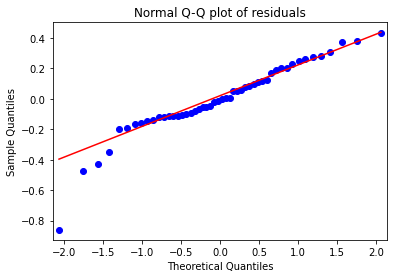

In [38]:
#QQ plot
sm.qqplot(model_R.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [39]:
list(np.where(model_R.resid<-0.8))

[array([49], dtype=int64)]

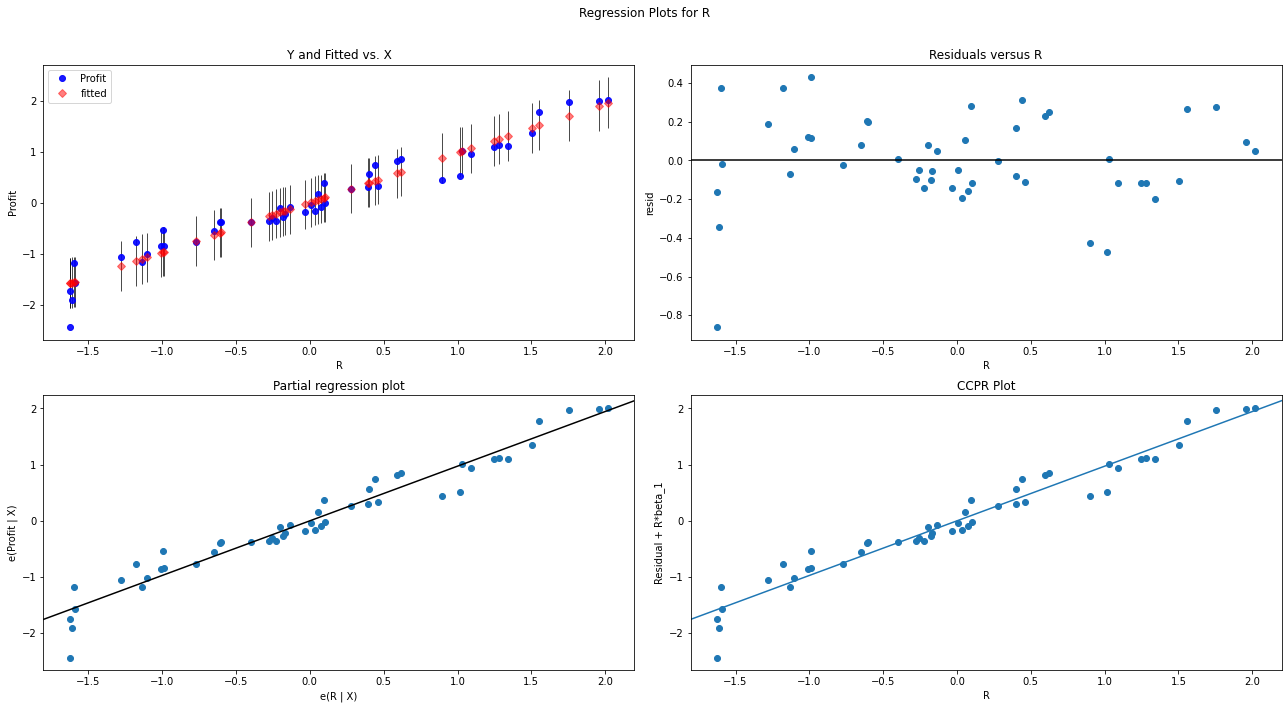

In [40]:
fig=plt.figure(figsize=(18,10))
sm.graphics.plot_regress_exog(model_R,'R',fig=fig)
plt.show()

In [41]:
#cook's distance

In [45]:
model_influence = model_R.get_influence()
(c, _) = model_influence.cooks_distance

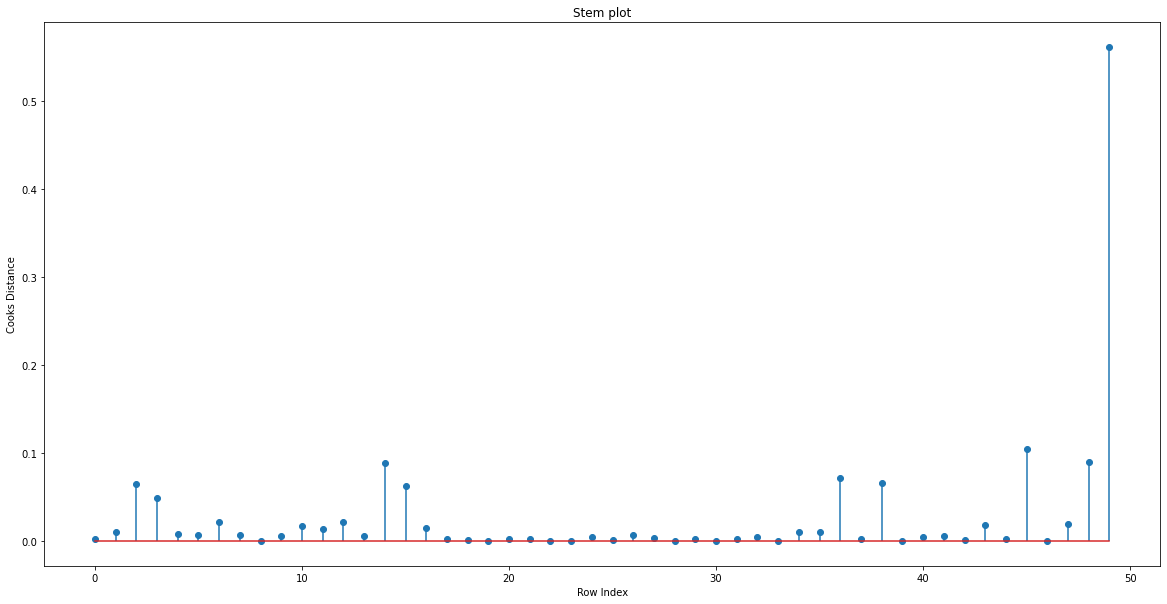

In [46]:
#Plot the influencers values using stem plot
fig=plt.figure(figsize=(20,10))
plt.title('Stem plot')
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
(np.argmax(c),np.max(c))

(49, 0.562061025926428)

In [48]:
#model improving
df_cleaned=df_cleaned_std.drop(df_cleaned_std.index[[49]],axis=0).reset_index()

In [49]:
df_cleaned.head(3)

,index,R,A,M,Profit,State_California,State_Florida,NW
0,0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741


In [50]:
final_model1 =smf.ols('Profit~R',data = df_cleaned).fit()
final_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 26 May 2022   Prob (F-statistic):           7.56e-34
Time:                        17:00:57   Log-Likelihood:                 10.434
No. Observations:                  49   AIC:                            -16.87
Df Residuals:                      47   BIC:                            -13.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0186      0.029      0.651      0.519      -0.039       0.076
R              0.9428      0.029     32.477      0.000       0.884       1.001
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
new_df=pd.DataFrame({'R':80000},index=[1])

In [54]:
final_model1.predict(new_df)

1    75422.256065
dtype: float64